In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import best_model
from astropy.io import fits
from astropy.time import Time
import glob
from ciao_contrib.runtool import *

In [117]:
#Errors
match_error = pd.read_csv('/opt/pwdata/katie/csc2.1/matching_error.txt', skiprows=1, names=['ids', 'date', 'exp', 'theta'])
fit_error = pd.read_csv('/opt/pwdata/katie/csc2.1/fitting_error.txt', skiprows=1, names=['ids'])
wav_error = pd.read_csv('/opt/pwdata/katie/csc2.1/wavdetect_error.txt', skiprows=1, names=['ids'])

#Other
stats =  pd.read_csv('/opt/pwdata/katie/csc2.1/stats.csv')
compton = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_compton_list.txt', skiprows=1, names=['ids'])
triply_unabsorbed_list = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/triply_unabsorbed_list.txt', skiprows=1, names=['ids'])

final_list=pd.read_csv('/opt/pwdata/katie/csc2.1/data_full.txt', skiprows=1, delimiter='  ',names=['NAME','OBSID','RA', 'DEC', 'Z', 'nH', 'COUNTS'])
final_min_abs = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_min_abs_full.csv')
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')

/var/folders/k6/tsv820sn5p716ph672hyrv8c004djp/T/ipykernel_6585/548578624.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  final_list=pd.read_csv('/opt/pwdata/katie/csc2.1/data_full.txt', skiprows=1, delimiter='  ',names=['NAME','OBSID','RA', 'DEC', 'Z', 'nH', 'COUNTS'])


In [26]:
#Get total repositories, tells us how many combos of obsid and target there are
total = [file for file in os.listdir('/opt/pwdata/katie/csc2.1') if not file.startswith('._')]
total = set([entry for entry in total if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1', entry))])

In [23]:
#Check compton thick in all different versions
main = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio.csv')
main_compton = set(main.loc[main['compton thick']=='True']['# ObsID'])
res = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_res.csv')
res_compton = set(res.loc[res['compton thick']=='True']['# ObsID'])
alt = pd.read_csv('/opt/pwdata/katie/csc2.1/allinfo_full_withratio_alt.csv')
alt_compton = set(alt.loc[alt['compton thick']=='True']['# ObsID'])

In [ ]:
#Get lists of the repositories put in all the different spots
final_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/final_data') if not file.startswith('._')]
final_reps = set([entry for entry in final_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/final_data', entry))])
main_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs') if not file.startswith('._')]
main_reps = set([entry for entry in main_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs', entry))])
alt_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_alt') if not file.startswith('._')]
alt_reps = set([entry for entry in alt_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_alt', entry))])
res_reps = [file for file in os.listdir('/opt/pwdata/katie/csc2.1/min_abs_res') if not file.startswith('._')]
res_reps = set([entry for entry in res_reps if os.path.isdir(os.path.join('/opt/pwdata/katie/csc2.1/min_abs_res', entry))])

In [28]:
#Printing out stuff
print(f"Ran code for {len(total)} obsid-object combos")
print(f"Wavdetect errors: {len(wav_error)}")
print(f"Match region errors: {len(match_error)}")
print(f"Sherpa fitting errors: {len(fit_error)}")
print()
print(f"Compton thick candidates in 'best' model: {len(compton)}")
print(f"Main Compton thick candidates: {len(main_compton)}")
print(f"Alt Compton thick candidates: {len(alt_compton)}")
print(f"Res Compton thick candidates: {len(res_compton)}")
print(f"Compton thick in at least one model: {len(main_compton | alt_compton | res_compton)}")
print()
print(f'Total "best" min abs using my current best model method: {len(final_reps)}')
print(f'Total main fit min abs: {len(main_reps)}')
print(f'Total alt fit min abs: {len(alt_reps)}')
print(f'Total res fit min abs: {len(res_reps)}')
print(f'Total min abs in at least one fit: {len(main_reps | alt_reps | res_reps )}')
print(f"Triply unabsorbed: {len(triply_unabsorbed_list)}")

Ran code for 2010 obsid-object combos
Wavdetect errors: 240
Match region errors: 805
Sherpa fitting errors: 98

Compton thick candidates in 'best' model: 0
Main Compton thick candidates: 42
Alt Compton thick candidates: 39
Res Compton thick candidates: 46
Compton thick in at least one model: 51

Total "best" min abs using my current best model method: 56
Total main fit min abs: 217
Total alt fit min abs: 60
Total res fit min abs: 84
Total min abs in at least one fit: 226
Triply unabsorbed: 24


Index(['# ObsID', 'Cstat', 'nH', 'nH error plus', 'nH error minus', 'gamma',
       'gamma error plus', 'gamma error minus', '0.3-7.5 flux',
       'xflux error plus', 'xflux_error_minus', '2-10 flux',
       'flux210 error plus', 'flux210 error minus', 'Soft flux',
       'fluxsoft error plus', 'fluxsoft error minus', 'Medium flux',
       'fluxmed error plus', 'fluxmed error minus', 'Hard flux',
       'fluxhard error plus', 'fluxhard error minus', 'Sum flux',
       'fluxsum error plus', 'fluxsum error minus', 'Test Statistic', 'Ce',
       'Cv', 'CXO name', 'RA', 'Dec', 'Z', 'galactic nH', 'counts',
       'luminosity', 'luminosity error', 'Flux_OIII_5006',
       'Flux_OIII_5006_err', 'Fx/F[OIII]', 'Fx/F[OIII].1', 'compton thick'],
      dtype='object')


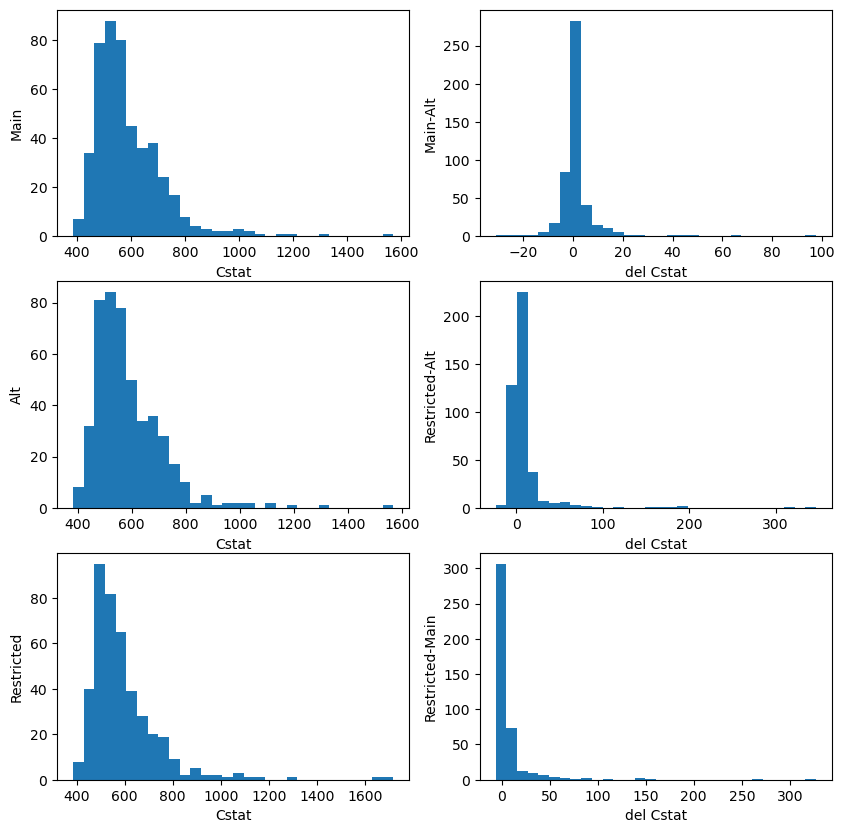

In [33]:
#Get some histograms to determine where our best model cutoff should be
%matplotlib inline
best_model.make_histograms('/opt/pwdata/katie/csc2.1', 30, 30)

In [120]:
#get the exposure time and date for all the match errors
dates = []
exps = []
thetas = []
problem_list = []

for number, row in match_error.iterrows():
    #exp time and date from header
    #print(row['ids'])
    try:
        file = glob.glob(f'/opt/pwdata/katie/csc2.1/{row["ids"]}/primary/*evt2*')[0]
    except:
        dates.append(np.nan)
        exps.append(np.nan)
        thetas.append(np.nan)
        problem_list.append(row['ids'])
        continue

    hdr = fits.getheader(file,ext=1)
    dates.append(hdr['DATE-OBS'])
    exps.append(hdr['EXPOSURE'])

    #off axis angle from ciao tool
    temprow=final_list.loc[final_list['OBSID']==f'{row["ids"]}']
    dmcoords.punlearn()
    dmcoords(file, option='cel', ra=list(temprow['RA'])[0], dec=list(temprow['DEC'])[0])
    thetas.append(dmcoords.theta)


match_error['date'] = dates
match_error['exp'] = exps
match_error['theta'] = thetas

19586
10342
2252
2579
7608
7608c
26139
9224
8259
4832
7748
15597
4129
4402
16575
20457
22027
9223
6820
17078
2081
22599
17287
17292
17297
17287b
17292b
17296
17298
17299
17300
17288b
17289b
17290b
17295b
17296b
17297b
17298b
17299b
17300b
16303
8621
8623
8622b
20424
12724
14379
18278
19961
19962
21424
12811
12826
12826b
26265
10127
13969
18444
7928
1647
17194
17563
7928b
7932
23602
24927
2979
2979b
21563
22505
12305
18219
4979
15192
10573
5625
10445
5006
13593
21543
22052
10567
21541
22044
13592
21540
21542
22043
13594
21540b
13591b
21540c
22043c
5904
5604
11564
11565
11566
23800
24443
3155
12793
14209
14211
20602
6842
7265
2453b
2117
17034b
15218
8009
8015b
15241
15242
15243b
15259
8014
8015c
15216
15217
15218b
15242b
15243c
7999
8004
8482
8483
15214
8013
15217b
7997
8122
8493
15212
15237
15238
15605
15606
15655
15224
15225
15248
362
7851
12077
12085
12086
8005
8016
8017
8018
8124
8549
8550
8552
8553
8011b
8553b
15209
15234
15236
15256
15600
8010c
8016b
8022
8550b
8553c
8555
15226
152

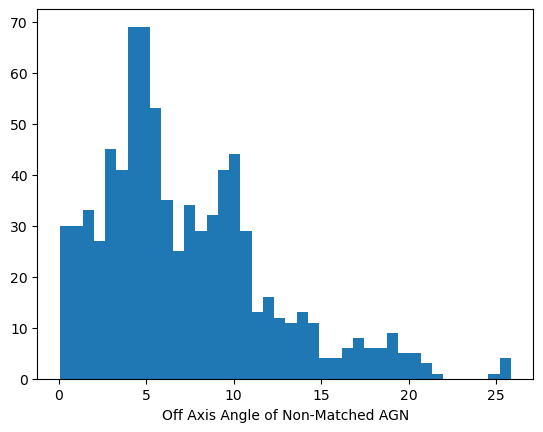

In [124]:
plt.plot(figsize=[8,6])
plt.hist(match_error['theta'], bins=40)
plt.xlabel('Off Axis Angle of Non-Matched AGN')
plt.show()

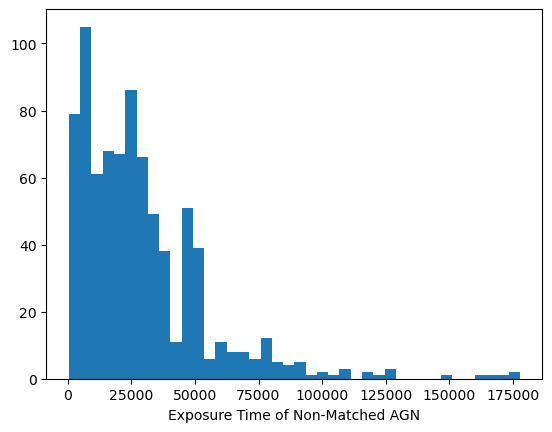

In [123]:
plt.plot(figsize=[8,6])
plt.hist(match_error['exp'], bins=40)
plt.xlabel('Exposure Time of Non-Matched AGN')
plt.show()

In [134]:
mjds=[]
for i in range(len(match_error['date'])):
    try:
        mjds.append(Time(match_error['date'][i]).mjd)
    except:
        mjds.append(np.nan)

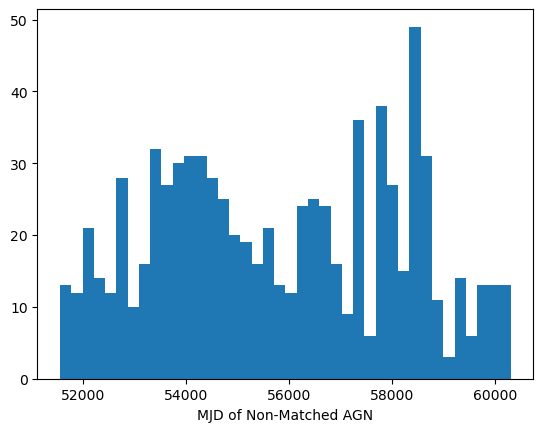

In [136]:
plt.plot(figsize=[8,6])
plt.hist(mjds, bins=40)
plt.xlabel('MJD of Non-Matched AGN')
plt.show()